In [1]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp

import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.precision", 2)

# Creating model object and indicating path
data_path = "../../input/Paper_1/processed/"
geo_model = gp.create_model("Paper_1-V1")

No module named 'osgeo'


## Step by step

In [2]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[0, 2000, 0, 20500, -8000, 0],
    resolution=[2, 50, 50],
    path_i=data_path + "synthetic_surfaces.csv",
    path_o=data_path + "orientations_points.csv",
)

Active grids: ['regular']


Paper_1-V1  2024-04-09 10:39

In [3]:
gp.get_data(
    geo_model,
    "surfaces",
)

,surface,series,order_surfaces,color,id
0,water,Default series,1,#015482,1
1,calareo9a,Default series,2,#9f0052,2
2,calcareo1a,Default series,3,#ffbe00,3
3,calcareo1b,Default series,4,#728f02,4
4,calcareo1c,Default series,5,#443988,5
5,calcareo2,Default series,6,#ff3f20,6
6,calcareo3,Default series,7,#5DA629,7
7,calcareo4a,Default series,8,#4878d0,8
8,calcareo5,Default series,9,#ee854a,9
9,calcareo6,Default series,10,#6acc64,10


In [4]:
# Ligando a camada a uma série (ponto de orientação somente para uma formação) do topo para base.
gp.map_stack_to_surfaces(
    geo_model,
    {
        "SF": ("water"),
        "Strat_2": ("calareo9a"),
        "Strat_3": ("calcareo1a"),
        "Strat_4": ("calcareo1b"),
        "Strat_5": ("calcareo1c"),
        "Strat_6": ("calcareo2"),
        "Strat_7": ("calcareo3"),
        "Strat_8": ("calcareo4a"),
        "Strat_9": ("calcareo5"),
        "Strat_10": ("calcareo6"),
        "Strat_11": ("calcareo6a"),
        "Strat_12": ("calcareo6b"),
        "Strat_13": ("calcareo7a"),
        "Strat_14": ("calcareo7b"),
        "Strat_15": ("calcareo9"),
        "Strat_16": ("calcareo10"),
        "Strat_17": ("calcareo11"),
        "Strat_18": ("calcareo11a"),
        "Strat_19": ("calcareo13"),
        "Strat_20": ("conglomerado1"),
        "Strat_21": ("conglomerado2"),
        "Strat_22": ("conglomerado3"),
        "Strat_23": ("conglomerado4"),
        "Strat_24": ("folhelho1"),
        "Strat_25": ("folhelho2"),
        "Strat_26": ("folhelho3a"),
        "Strat_27": ("folhelho4"),
        "Strat_28": ("folhelho4a"),
        "Strat_29": ("folhelho5"),
        "Strat_30": ("folhelho5a"),
        "Strat_31": ("follhelho4b"),
        "Basement_series": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,water,SF,1,#015482,1
1,calareo9a,Strat_2,1,#9f0052,2
2,calcareo1a,Strat_3,1,#ffbe00,3
3,calcareo1b,Strat_4,1,#728f02,4
4,calcareo1c,Strat_5,1,#443988,5
5,calcareo2,Strat_6,1,#ff3f20,6
6,calcareo3,Strat_7,1,#5DA629,7
7,calcareo4a,Strat_8,1,#4878d0,8
8,calcareo5,Strat_9,1,#ee854a,9
9,calcareo6,Strat_10,1,#6acc64,10


In [5]:
geo_model.series

,order_series,BottomRelation,isActive,isFault,isFinite
SF,1,Erosion,True,False,False
Strat_2,2,Erosion,True,False,False
Strat_3,3,Erosion,True,False,False
Strat_4,4,Erosion,True,False,False
Strat_5,5,Erosion,True,False,False
Strat_6,6,Erosion,True,False,False
Strat_7,7,Erosion,True,False,False
Strat_8,8,Erosion,True,False,False
Strat_9,9,Erosion,True,False,False
Strat_10,10,Erosion,True,False,False


In [6]:
geo_model.get_data()

X         Y        Z    smooth      surface   G_x   
surface_points 0     1000.0     23.40   -36.11  2.00e-06        water   NaN  \
               1     1000.0    274.97   -62.71  2.00e-06        water   NaN   
               2     1000.0    545.56  -212.83  2.00e-06        water   NaN   
               3     1000.0    778.11  -389.56  2.00e-06        water   NaN   
               4     1000.0   1069.17  -389.56  2.00e-06        water   NaN   
...                     ...       ...      ...       ...          ...   ...   
orientations   4345  2000.0  12571.17 -4262.32  1.00e-02  follhelho4b  0.12   
               4346  2000.0  12648.69 -4235.72  1.00e-02  follhelho4b  0.12   
               4347  2000.0  12746.68 -4235.72  1.00e-02  follhelho4b  0.06   
               4348  2000.0  12822.74 -4235.72  1.00e-02  follhelho4b  0.02   
               4349  2000.0  12881.24 -4287.03  1.00e-02  follhelho4b  0.02   

                      G_y   G_z  
surface_points 0      NaN   NaN  
               1      NaN   NaN  
               2      NaN   NaN  
               3      NaN   NaN  
               4      NaN   NaN  
...                   ...   ...  
orientations   4345 -0.35  0.93  
               4346 -0.35  0.93  
               4347 -0.33  0.94  
               4348 -0.24  0.97  
               4349 -0.24  0.97  

[8700 rows x 8 columns]

In [10]:
neighbours = gp.select_nearest_surfaces_points(geo_model, geo_model.surface_points.df, 10)
opoints = gp.set_orientation_from_neighbours_all(geo_model, neighbours)

In [12]:
geo_model.get_data()

X         Y        Z    smooth      surface   G_x   
surface_points 0     1000.0     23.40   -36.11  2.00e-06        water   NaN  \
               1     1000.0    274.97   -62.71  2.00e-06        water   NaN   
               2     1000.0    545.56  -212.83  2.00e-06        water   NaN   
               3     1000.0    778.11  -389.56  2.00e-06        water   NaN   
               4     1000.0   1069.17  -389.56  2.00e-06        water   NaN   
...                     ...       ...      ...       ...          ...   ...   
orientations   3970  2000.0  12571.17 -4262.32  1.00e-02  follhelho4b  0.12   
               3971  2000.0  12648.69 -4235.72  1.00e-02  follhelho4b  0.12   
               3972  2000.0  12746.68 -4235.72  1.00e-02  follhelho4b  0.06   
               3973  2000.0  12822.74 -4235.72  1.00e-02  follhelho4b  0.02   
               3974  2000.0  12881.24 -4287.03  1.00e-02  follhelho4b  0.02   

                      G_y   G_z  
surface_points 0      NaN   NaN  
               1      NaN   NaN  
               2      NaN   NaN  
               3      NaN   NaN  
               4      NaN   NaN  
...                   ...   ...  
orientations   3970 -0.35  0.93  
               3971 -0.35  0.93  
               3972 -0.33  0.94  
               3973 -0.24  0.97  
               3974 -0.24  0.97  

[8700 rows x 8 columns]

In [16]:
# Salvando os pontos de orientação gerados pelo KNN (K=10)
orientations_p = geo_model.orientations.df
#orientations_p.to_csv(data_path + "orientations_points.csv")
orientations_p

,X,Y,Z,X_c,Y_c,Z_c,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
3975,1000.0,23.40,-36.11,0.50,0.25,0.59,-1.30e-02,0.41,0.91,24.42,3.58e+02,1.0,water,SF,1.0,1.0,0.01
3976,1000.0,274.97,-62.71,0.50,0.26,0.59,-1.30e-02,0.41,0.91,24.42,3.58e+02,1.0,water,SF,1.0,1.0,0.01
3977,1000.0,545.56,-212.83,0.50,0.26,0.59,5.60e-18,0.42,0.91,24.91,7.61e-16,1.0,water,SF,1.0,1.0,0.01
3978,1000.0,778.11,-389.56,0.50,0.27,0.58,-3.77e-18,0.38,0.92,22.51,3.60e+02,1.0,water,SF,1.0,1.0,0.01
3979,1000.0,1069.17,-389.56,0.50,0.28,0.58,1.68e-18,0.39,0.92,22.76,2.49e-16,1.0,water,SF,1.0,1.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970,2000.0,12571.17,-4262.32,0.52,0.56,0.49,1.15e-01,-0.35,0.93,21.42,1.62e+02,1.0,follhelho4b,Strat_31,31.0,31.0,0.01
3971,2000.0,12648.69,-4235.72,0.52,0.56,0.49,1.15e-01,-0.35,0.93,21.42,1.62e+02,1.0,follhelho4b,Strat_31,31.0,31.0,0.01
3972,2000.0,12746.68,-4235.72,0.52,0.56,0.49,5.54e-02,-0.33,0.94,19.72,1.71e+02,1.0,follhelho4b,Strat_31,31.0,31.0,0.01
3973,2000.0,12822.74,-4235.72,0.52,0.56,0.49,2.34e-02,-0.24,0.97,14.24,1.75e+02,1.0,follhelho4b,Strat_31,31.0,31.0,0.01


In [17]:
# Trocando o nome de surface para formation (necessário se for importar no Gempy)
orientations_p_formation = orientations_p.copy()
orientations_p_formation = orientations_p_formation.rename(columns={'surface': 'formation'})
orientations_p_formation.to_csv(data_path + "orientations_points.csv")
orientations_p_formation

,X,Y,Z,X_c,Y_c,Z_c,G_x,G_y,G_z,dip,azimuth,polarity,formation,series,id,order_series,smooth
3975,1000.0,23.40,-36.11,0.50,0.25,0.59,-1.30e-02,0.41,0.91,24.42,3.58e+02,1.0,water,SF,1.0,1.0,0.01
3976,1000.0,274.97,-62.71,0.50,0.26,0.59,-1.30e-02,0.41,0.91,24.42,3.58e+02,1.0,water,SF,1.0,1.0,0.01
3977,1000.0,545.56,-212.83,0.50,0.26,0.59,5.60e-18,0.42,0.91,24.91,7.61e-16,1.0,water,SF,1.0,1.0,0.01
3978,1000.0,778.11,-389.56,0.50,0.27,0.58,-3.77e-18,0.38,0.92,22.51,3.60e+02,1.0,water,SF,1.0,1.0,0.01
3979,1000.0,1069.17,-389.56,0.50,0.28,0.58,1.68e-18,0.39,0.92,22.76,2.49e-16,1.0,water,SF,1.0,1.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970,2000.0,12571.17,-4262.32,0.52,0.56,0.49,1.15e-01,-0.35,0.93,21.42,1.62e+02,1.0,follhelho4b,Strat_31,31.0,31.0,0.01
3971,2000.0,12648.69,-4235.72,0.52,0.56,0.49,1.15e-01,-0.35,0.93,21.42,1.62e+02,1.0,follhelho4b,Strat_31,31.0,31.0,0.01
3972,2000.0,12746.68,-4235.72,0.52,0.56,0.49,5.54e-02,-0.33,0.94,19.72,1.71e+02,1.0,follhelho4b,Strat_31,31.0,31.0,0.01
3973,2000.0,12822.74,-4235.72,0.52,0.56,0.49,2.34e-02,-0.24,0.97,14.24,1.75e+02,1.0,follhelho4b,Strat_31,31.0,31.0,0.01


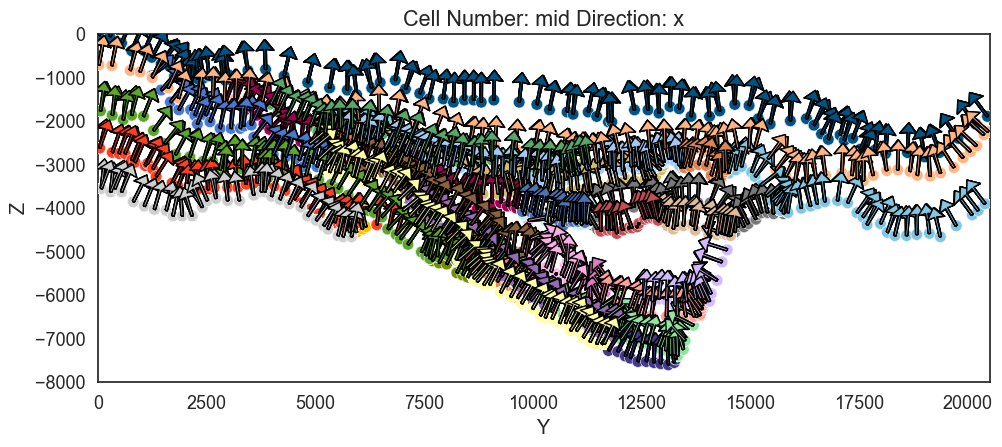

In [7]:
# Seção transversal do modelo
#gp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=5, legend=False)
gp.plot_2d(geo_model, direction="x", show_data=True, show_lith=True, ve=1, legend=False)
#gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

In [8]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="background",
    image=False,
    show_data=True,
    show_surfaces=True,
    show_scalar=True,
    show_boundaries=True,
    ve=1,
)

In [9]:
%%time
gp.set_interpolator(
    geo_model, 
    output=['geology'], 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
    verbose=[]
)

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                                                                                                            values
range                                                                                                    22096.38
$C_o$                                                                                                  11625000.0
drift equations  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
CPU times: total: 18.9 s
Wall time: 19.7 s


In [10]:
geo_model.update_to_interpolator()

True

In [11]:
%%time
gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

CPU times: total: 3min 16s
Wall time: 40.4 s



Lithology ids 
  [15. 15. 15. ...  1.  1.  1.] 

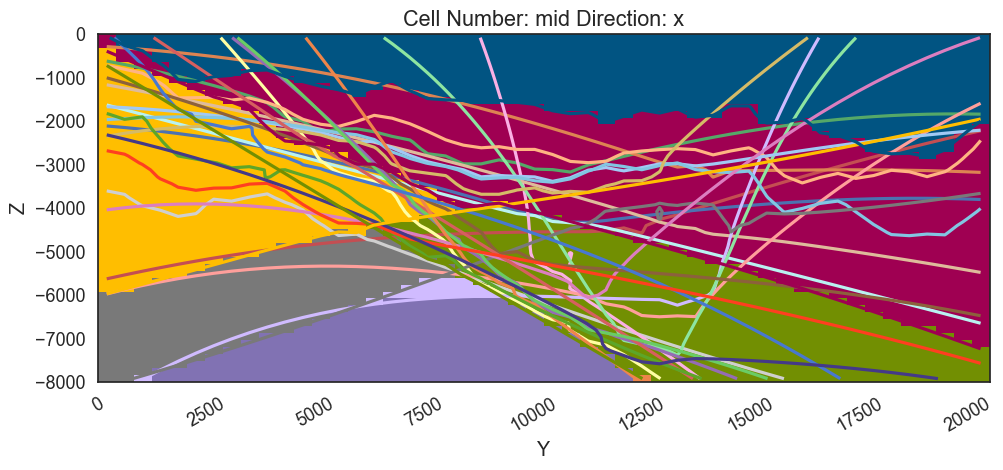

In [12]:
# Seção transversal do modelo

gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=1,
    legend=True,
)

In [14]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type="background", show_data=True, ve=1)

ERROR:root:failed to get valid pixel format.
ERROR:root:GLEW could not be initialized: Missing GL version
ERROR:root:1: #version 150
ERROR:root:Could not create shader object.
ERROR:root:attempt to add attribute without a program for attribute ndCoordIn
ERROR:root:Couldn't build the shader program for depth blits
ERROR:root:1: #version 150
ERROR:root:Could not create shader object.


: 

In [ ]:
topo_init = tp.compute_topology(
    geo_model, direction="x", voxel_threshold=1
)  # , direction="Y", cell_number=15)
edges_init, centroids_init = tp.clean_unconformity_topology(
    geo_model, 1, topo_init[0], topo_init[1]
)

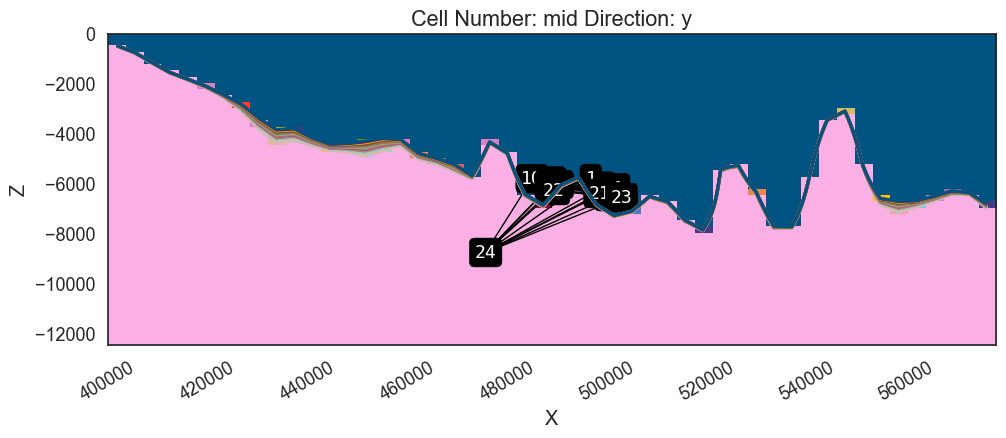

In [24]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=5,
)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)

In [25]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    compress=True,
)

True

In [26]:
import pickle
import datetime
model_name = "StratBR_BES_v6"
resolution = [50, 50, 50]
date_t = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
fn = f"{model_name}_{resolution[0]}x_{resolution[1]}y_{resolution[2]}z_{date_t}.pkl"
save_path = "../../../../output/BES/StartBR/V6/"
with open(save_path + fn, "wb") as f:
    pickle.dump(geo_model, f)